In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

In [8]:
# 1. Load & clean dataset
df = pd.read_csv('Datasets/uber.csv')
df = df.drop(columns=['Unnamed: 0','key','pickup_datetime'])   # remove useless cols
df = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(df), columns=df.columns)  # fill missing values
print(df)


        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0               7.5        -73.999817        40.738354         -73.999512   
1               7.7        -73.994355        40.728225         -73.994710   
2              12.9        -74.005043        40.740770         -73.962565   
3               5.3        -73.976124        40.790844         -73.965316   
4              16.0        -73.925023        40.744085         -73.973082   
...             ...               ...              ...                ...   
199995          3.0        -73.987042        40.739367         -73.986525   
199996          7.5        -73.984722        40.736837         -74.006672   
199997         30.9        -73.986017        40.756487         -73.858957   
199998         14.5        -73.997124        40.725452         -73.983215   
199999         14.1        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  
0              40.723217       

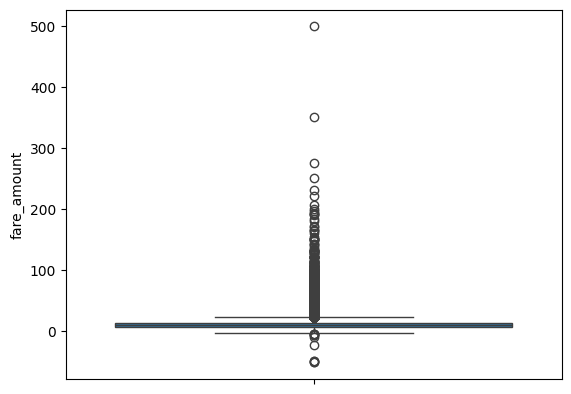

In [9]:
# 2. Outlier check (boxplot)
sns.boxplot(df['fare_amount'])
plt.show()

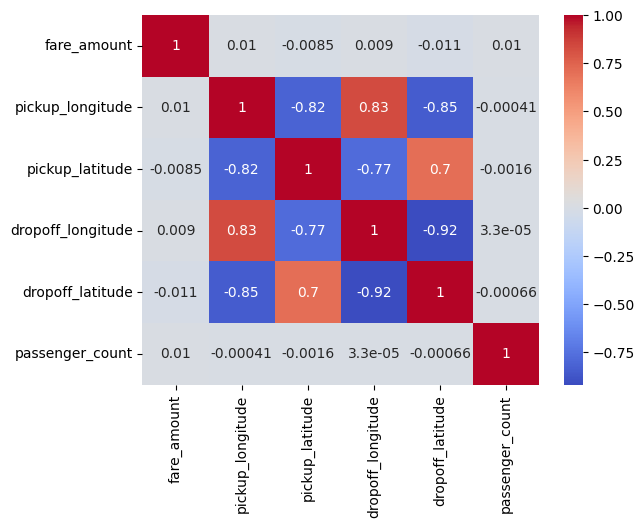

In [10]:
# 3. Correlation check
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [11]:
# 4. Split features & target
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df)

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0               7.5        -73.999817        40.738354         -73.999512   
1               7.7        -73.994355        40.728225         -73.994710   
2              12.9        -74.005043        40.740770         -73.962565   
3               5.3        -73.976124        40.790844         -73.965316   
4              16.0        -73.925023        40.744085         -73.973082   
...             ...               ...              ...                ...   
199995          3.0        -73.987042        40.739367         -73.986525   
199996          7.5        -73.984722        40.736837         -74.006672   
199997         30.9        -73.986017        40.756487         -73.858957   
199998         14.5        -73.997124        40.725452         -73.983215   
199999         14.1        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  
0              40.723217       

In [12]:
# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [13]:
# 5. Train Models
models = {"Linear": LinearRegression(), "Ridge": Ridge(alpha=1.0), "Lasso": Lasso(alpha=0.1)}


In [14]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} → R2: {r2:.4f}, RMSE: {rmse:.2f}")

Linear → R2: 0.0003, RMSE: 10.31
Ridge → R2: 0.0003, RMSE: 10.31
Lasso → R2: -0.0000, RMSE: 10.31
